# Projekt praktyczny (regresja)

## Zbiór danych *Life Expectancy Data.csv* następujące kolumny:
- Country - państwo\
- Status - kraj rozwijający się / rozwinięty\
- Life expectancy - oczekiwana długość życia w latach\
- Adult Mortality - śmiertelność wśród dorosłych, prawdopodobieństwo śmierci w wieku między 15 a 60 lat na 1000 osób\
- infant deaths - śmiertelnośc noworodków w przeliczeniu na 1000 urodzeń\
- Alcohol - konsumpcja alkoholu wśród osób 15+ [w litrach]\
- percentage expenditure - udział wydatków na sektor zdrowia w PKB per capita\
- Hepatitis B - udział zaszczepionych dzieci do 1 roku życia na WZW typu B\
- Measles - liczba odnotowanych przypadków zachorowań na odrę na 1000 mieszkańców\
- BMI\
- under-five deaths - liczba śmierci na 1000 dzieci poniżej 5 roku życia\
- Polio - udział zaszczepionych dzieci do 1 roku życia na Polio\
- Total expenditure - udział wydatków na sektor zdrowia w całości wydatków rządowych\
- Diphtheria - udział zaszczepionych dzieci do 1 roku życia na błonicę i krztusiec\
- HIV/AIDS - śmierci dzieci poniżej 5 roku życia na 1 000 żywych urodzeń spowodowane HIV/AIDS\
- GDP - PKB per capita\
- Population - liczba mieszkańców\
- thinness 1-19 years - rozpowszechnienie chudości w wieku 1 -19 lat\
- thinness 5-9 years - rozpowszechnienie chudości w wieku 5 - 9 lat\
- Income composition of resources - Wskaźnik rozwoju społecznego HDI Human Development Index\
- Schooling - liczba lat nauczania szkolnego\

# Celem projektu jest:
1. przygotowanie i analiza dostarczonych danych
2. budowa i analiza jakości modeli do prognozy oczekiwanej długości życia w latach
3. ocena opracowanych modeli

## Zaimportuj biblioteki

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

## Wczytaj plik *Life Expectancy Data.csv* oraz wyświetl kilka pierwszych wierszy



In [235]:
data = pd.read_csv('Life Expectancy Data.csv', sep=';')
data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Albania,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,Algeria,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,Angola,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Preprocessing
- wyświetl rozmiar zbioru
- sprawdź ilość NaN-ów
- jesli występują kolumny z dużą lością NaN-ów usuń je
- sprawdź statystyki NaN-ów dla wierszy (m.in. jaka jest mininalna, maxymalna, srednia liczba nanów w wierszu). Jeśli są wiersze, dla których jest >=5 braki usuń je i zresetuj indexy
- wyświetl wiersze od 170 do 175
- pozostałe NaN-y uzupełnij średnią
- oblicz statystyki opisowe

### Rozmiar zbioru

In [236]:
print(f'Rows: {data.shape[0]}\nColumns: {data.shape[1]}')

Rows: 183
Columns: 21


### Ilość NaN-ów w zbiorze

In [237]:
data.isnull().sum()

Country                              0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
HIV/AIDS                             0
GDP                                 29
Population                          41
thinness 1-19 years                  2
thinness 5-9 years                   2
Income composition of resources     10
Schooling                           10
dtype: int64

### Usuwamy kolumny 'Alcohol' i 'Total expenditure', gdyż w większości zawierają NaN-y

In [238]:
data = data.drop(['Alcohol', 'Total expenditure'], axis=1)

### Usuwamy wiersze, które mają przynajmniej 5 NaN-ów

In [239]:
rows_to_remove = data.isnull().sum(axis=1)
print(rows_to_remove.describe())

rows_to_remove = rows_to_remove[rows_to_remove >= 5]
print(f'Rows to remove: {rows_to_remove.shape[0]}')
data = data.drop(rows_to_remove.index)

data = data[data.isnull().sum(axis=1) < 5]

count    183.000000
mean       0.573770
std        1.086263
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
dtype: float64
Rows to remove: 1


### Reset indexów

In [240]:
data = data.reset_index(drop=True)

### Wiersze od 170 do 175

In [241]:
data.iloc[170:176]

,Country,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
170,Ukraine,Developing,71.3,195.0,4,0.0,22.0,105,61.3,5,51.0,23.0,0.2,2124.662666,4515429.0,2.3,2.4,0.748,15.3
171,United Arab Emirates,Developing,77.1,75.0,1,0.0,99.0,347,64.2,1,99.0,99.0,0.1,3911.746890,NaN,5.3,5.1,0.836,13.3
172,United Republic of Tanzania,Developing,61.8,279.0,85,0.0,98.0,30,23.8,119,96.0,98.0,1.4,NaN,NaN,6.7,6.5,NaN,NaN
173,United States of America,Developed,79.3,13.0,23,0.0,92.0,188,69.6,26,93.0,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
174,Uruguay,Developing,77.0,116.0,0,0.0,95.0,0,64.0,0,95.0,95.0,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5
175,Uzbekistan,Developing,69.4,184.0,15,0.0,99.0,22,44.7,17,99.0,99.0,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1


### Wypełniamy pozostałe NaN-y średnią wartością z kolumn

In [242]:
columns_to_fill = ['Population', 'Schooling', 'BMI',
                   'Income composition of resources', 'thinness 1-19 years', 'thinness 5-9 years', 'GDP', 'Hepatitis B']

for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].mean())

data.isnull().sum()

Country                            0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Statystyki opisowe

In [243]:
data.describe()

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,1.820000e+02,182.000000,182.000000,182.000000,182.000000
mean,71.564286,153.324176,23.917582,2.397005,82.425287,1510.659341,42.621667,31.763736,83.137363,84.571429,0.663736,7185.331746,1.109741e+07,4.555556,4.597778,0.691740,12.927168
std,8.114743,97.630430,83.900288,27.536214,23.471921,7863.325029,20.551768,108.057506,24.293960,22.207780,1.347764,10754.737453,2.556250e+07,4.078596,4.158675,0.149549,2.839036
min,51.000000,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000
25%,65.725000,74.250000,0.000000,0.000000,81.000000,0.000000,24.300000,0.000000,83.000000,83.250000,0.100000,1149.336165,5.961512e+05,1.525000,1.500000,0.575250,11.100000
50%,73.750000,138.500000,2.000000,0.000000,92.000000,16.500000,48.500000,3.000000,93.000000,93.000000,0.100000,4129.940335,5.495754e+06,3.500000,3.400000,0.718000,12.963584
75%,76.850000,214.000000,17.000000,0.000000,97.000000,204.000000,61.300000,21.000000,97.000000,97.000000,0.400000,7185.331746,1.109741e+07,6.500000,6.400000,0.794750,14.875000
max,88.000000,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000


# Wizualizacja

Wykonaj wykresy rozkładu (histogram i ramka-wąsy) zmiennej *Life expectancy* skategoryzowane w zalezności od statusu kraju. Zinterpretuj wyniki.

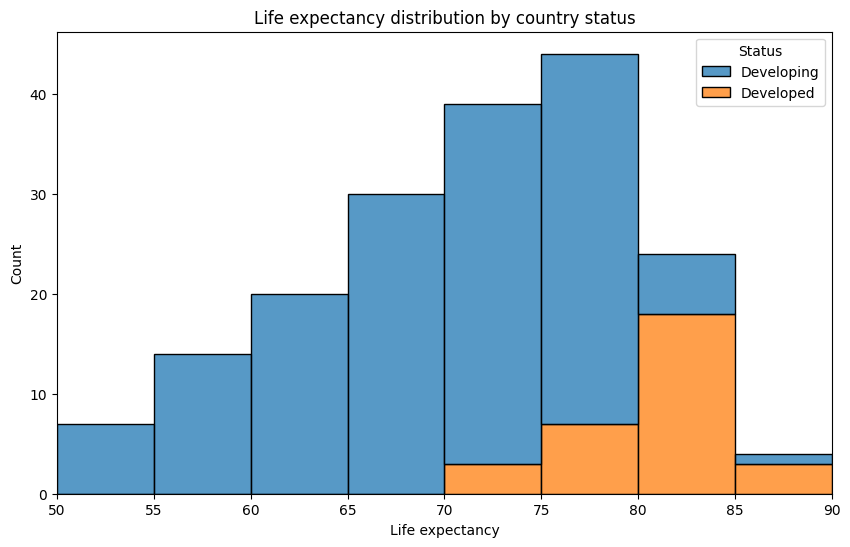

In [244]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Life expectancy', hue='Status', multiple='stack',
             bins=range(50, int(data['Life expectancy'].max()) + 5, 5))
plt.xlim(50, 90)
plt.title('Life expectancy distribution by country status')
plt.show()

Na przedstawionym histogramie zauważalne są istotne różnice w oczekiwanej długości życia między krajami rozwijającymi się a rozwiniętymi. W krajach rozwijających się, oczekiwana długość życia jest zróżnicowana, głównie oscyluje w zakresie 50-75 lat, z dominującym słupkiem przy wartości 70 lat. W przeciwieństwie, kraje rozwinięte charakteryzują się wyższą oczekiwaną długością życia, skoncentrowaną głównie w przedziale 75-90 lat, z największymi słupkami przy 80 i 85 latach. Te dane jasno wskazują na wyższą długość życia w krajach rozwiniętych oraz podkreślają globalne nierówności zdrowotne.

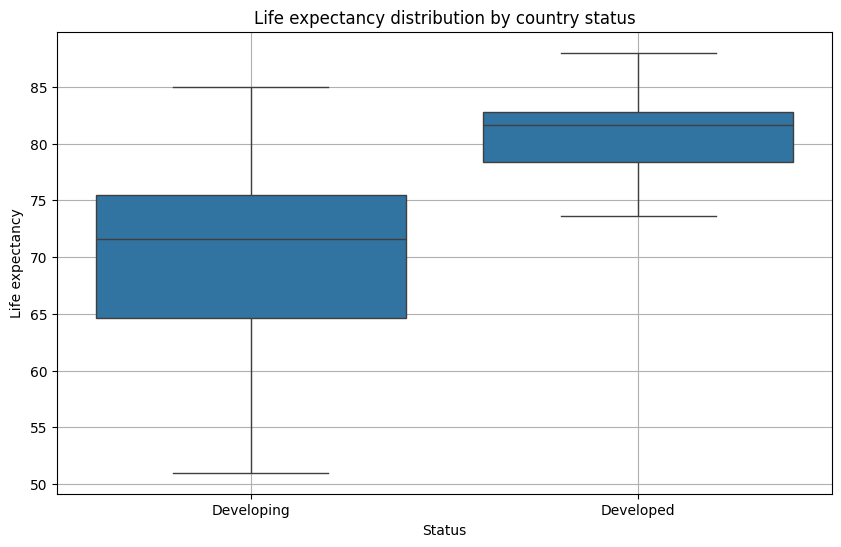

In [245]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Status', y='Life expectancy')
plt.grid()
plt.title('Life expectancy distribution by country status')
plt.show()

Na przedstawionym wykresie ramka-wąsy obserwujemy rozkład oczekiwanej długości życia w zależności od statusu kraju: rozwijające się i rozwinięte. Mediana i średnia oczekiwanej długości życia są znacząco wyższe w krajach rozwiniętych, co sugeruje lepszy dostęp do opieki zdrowotnej i wyższy standard życia. Kraje rozwijające się charakteryzują się większym rozstępem wartości, co odzwierciedla różnice w warunkach życiowych i dostępie do zdrowia, prowadząc do większej zmienności w oczekiwanej długości życia. W krajach rozwiniętych dane są bardziej skoncentrowane, co wskazuje na mniejszą zmienność i wysoki, jednolity poziom oczekiwanej długości życia. Brak wyraźnych outlierów na wykresie podkreśla, że większość danych mieści się w ramach typowych wartości dla każdej grupy. 

# Korelacja
Wykonaj macierz korelacji dla zmiennych ilościowych. Z którymi zmiennymi skorelowana jest zmienna *Life expectancy*. Zinterpretuj te korelacje.

In [246]:
correct_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = correct_columns.corr()
correlation_matrix['Life expectancy']

Life expectancy                    1.000000
Adult Mortality                   -0.778098
infant deaths                     -0.240637
percentage expenditure             0.044703
Hepatitis B                        0.400029
Measles                           -0.073734
BMI                                0.507324
under-five deaths                 -0.271345
Polio                              0.514539
Diphtheria                         0.499242
HIV/AIDS                          -0.608261
GDP                                0.426411
Population                        -0.043955
thinness 1-19 years               -0.466750
thinness 5-9 years                -0.466594
Income composition of resources    0.864762
Schooling                          0.779746
Name: Life expectancy, dtype: float64


Zauważalnie, największą ujemną korelację z oczekiwaną długością życia ma wskaźnik śmiertelności dorosłych (-0.778), co wskazuje, że wyższe wskaźniki śmiertelności dorosłych wiążą się z niższą przewidywaną długością życia. Podobne, ale mniej wyraźne ujemne korelacje obserwujemy dla liczby zgonów dzieci poniżej piątego roku życia oraz niedożywienia dzieci w wieku 1-19 lat, co podkreśla, jak istotny jest dostęp do opieki zdrowotnej i odpowiednie żywienie w młodym wieku dla długowieczności.

Pozytywne korelacje wskazują na czynniki związane z lepszym zdrowiem i dłuższym życiem. Szczególnie silna jest korelacja między oczekiwaną długością życia a poziomem edukacji (0.717 oraz 0.779), co sugeruje, że wyższy poziom edukacji wiąże się z lepszymi wyborami zdrowotnymi i dostępem do opieki zdrowotnej. Ponadto, wysoka korelacja z przychodami oraz indeksem BMI sugeruje, że wyższe dochody i lepszy status żywieniowy również przyczyniają się do dłuższego życia.

Inne pozytywne korelacje, takie jak te związane z wyszczepialnością przeciwko polio i błonicy, podkreślają znaczenie programów zdrowia publicznego i prewencji. Zaskakujące może być stosunkowo niska korelacja między wydatkami na zdrowie a oczekiwaną długością życia, co może sugerować, że nie tylko ilość wydatków zdrowotnych, ale również ich efektywność ma kluczowe znaczenie dla poprawy zdrowia publicznego.

# Podziel zbiór danych na zbiór treningowy i testowy w stodunku 80% do 20%.

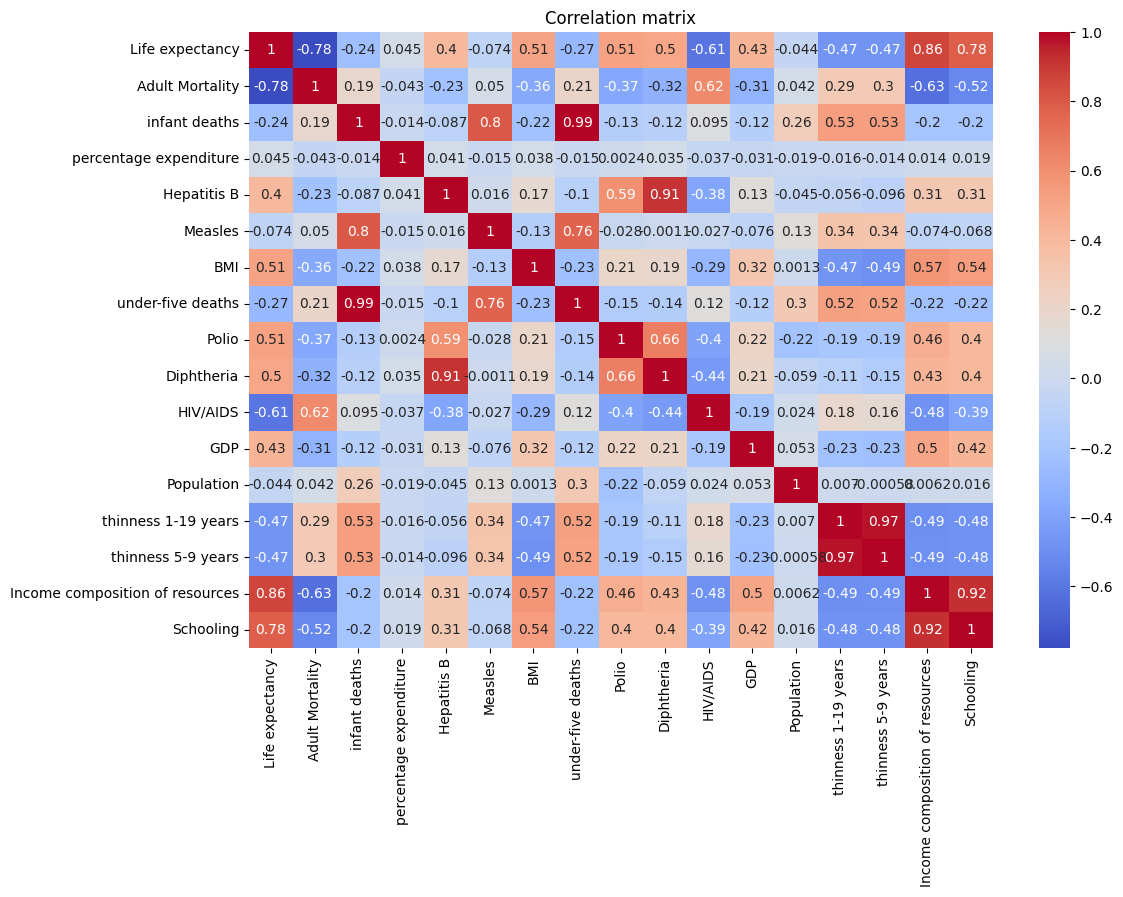

In [247]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Regresja linowa jednej zmiennej
- Zbuduj model regresji liniowej prostej (jednej zmiennej) umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienna objaśniająca) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).


### Model długości życia, zmienna objaśniająca to Schooling

In [248]:
x = data[['Schooling']]
y = data[['Life expectancy']]

In [249]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [250]:
for subset in [x, y, x_train, y_train, x_test, y_test]:
    print(subset.shape)
    
print(f'test percentage: {x_test.shape[0] / x.shape[0] * 100:.2f}%')

(182, 1)
(182, 1)
(145, 1)
(145, 1)
(37, 1)
(37, 1)
test percentage: 20.33%


In [251]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [252]:
model.coef_

array([[2.16647187]])

In [253]:
model.intercept_

array([43.67047113])

# Predykcja

In [254]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [255]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f'R2:\n Train: {r2_train}\n Test: {r2_test}')
print(f'MAE:\n Train: {mae_train}\n Test: {mae_test}')
print(f'MSE:\n Train: {mse_train}\n Test: {mse_test}')
print(f'RMSE:\n Train: {rmse_train}\n Test: {rmse_test}')

R2:
 Train: 0.6086416068851386
 Test: 0.6031585146551186
MAE:
 Train: 3.7262449249624243
 Test: 4.174811712340556
MSE:
 Train: 24.505533540502167
 Test: 30.452427090048502
RMSE:
 Train: 4.950306408749075
 Test: 5.518371778889902


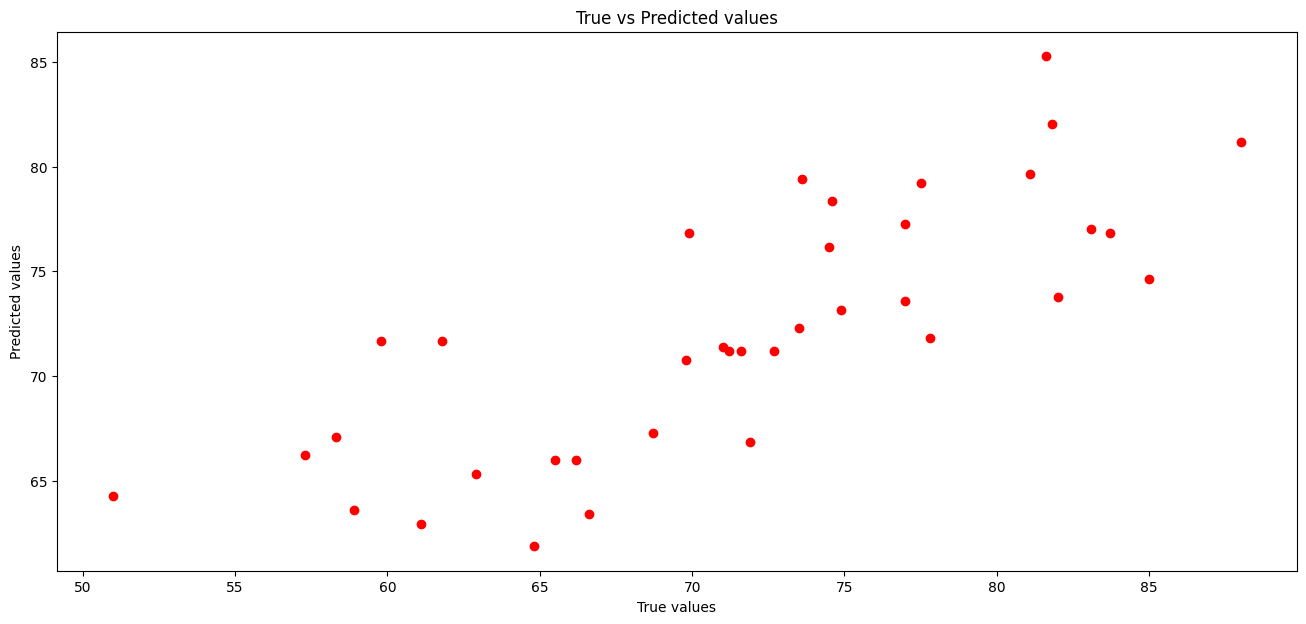

In [256]:
fig, ax = plt.subplots(figsize=(16, 7))

ax.scatter(x=y_test, y=y_pred_test, color='red')
ax.set_xlabel('True values')
ax.set_ylabel('Predicted values')

plt.title('True vs Predicted values')
plt.show()

Model predykcyjny oparty na zmiennej "Schooling" do przewidywania "Life expectancy" wykazuje umiarkowane dopasowanie, z wartościami R2 około 0.6086 i 0.6032 dla danych treningowych i testowych, odpowiednio, co sugeruje, że model w umiarkowanym stopniu wyjaśnia zmienność oczekiwanej długości życia. Średnie błędy bezwzględne (MAE) i pierwiastki błędów kwadratowych (RMSE) są nieco wyższe dla danych testowych niż treningowych, co wskazuje na lekkie problemy z generalizacją modelu na nowe dane, ale różnice te nie są wystarczająco duże, aby sugerować przetrenowanie. Wykres wartości rzeczywistych w porównaniu z przewidywanymi pokazuje, że model lepiej radzi sobie z niższymi wartościami oczekiwanej długości życia. Ogólnie model można ocenić jako **dobrze dopasowany**.

# Regresja linowa wielu zmiennych
- Zbuduj model regresji liniowej wielu zmiennych umozliwijący przewidywanie długości życia. Odpowiednio przygotuj X (zmienne objaśniające) i y (zmienna objasniana).
- Wykonaj predykcję dla zbioru treningowego i testowego
- Oblicz metryki (R2, MAE, MSE, RMSE). Oceń jakość modelu (dobrze dopasowany, przetrenowany, niedotrenowany).

### Model długości życia, zmienne objaśniające: Adult Mortality, HIV/AIDS, Income composition of resources, Schooling

In [257]:
x = data[['Adult Mortality', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
y = data[['Life expectancy']]

In [258]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [259]:
for subset in [x, y, x_train, y_train, x_test, y_test]:
    print(subset.shape)

37/183

(182, 4)
(182, 1)
(145, 4)
(145, 1)
(37, 4)
(37, 1)


0.20218579234972678

In [260]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [261]:
model.coef_

array([[-2.50561164e-02, -8.05175515e-01,  2.99358706e+01,
         1.66859392e-01]])

In [262]:
model.intercept_

array([53.09625146])

# Predykcja

In [263]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [264]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f'R2:\n Train: {r2_train}\n Test: {r2_test}')
print(f'MAE:\n Train: {mae_train}\n Test: {mae_test}')
print(f'MSE:\n Train: {mse_train}\n Test: {mse_test}')
print(f'RMSE:\n Train: {rmse_train}\n Test: {rmse_test}')

R2:
 Train: 0.8463552355860164
 Test: 0.850374676972718
MAE:
 Train: 2.1929478869617465
 Test: 2.5875063593560905
MSE:
 Train: 9.62071337656065
 Test: 11.481799178211933
RMSE:
 Train: 3.1017274826394163
 Test: 3.3884803641473167


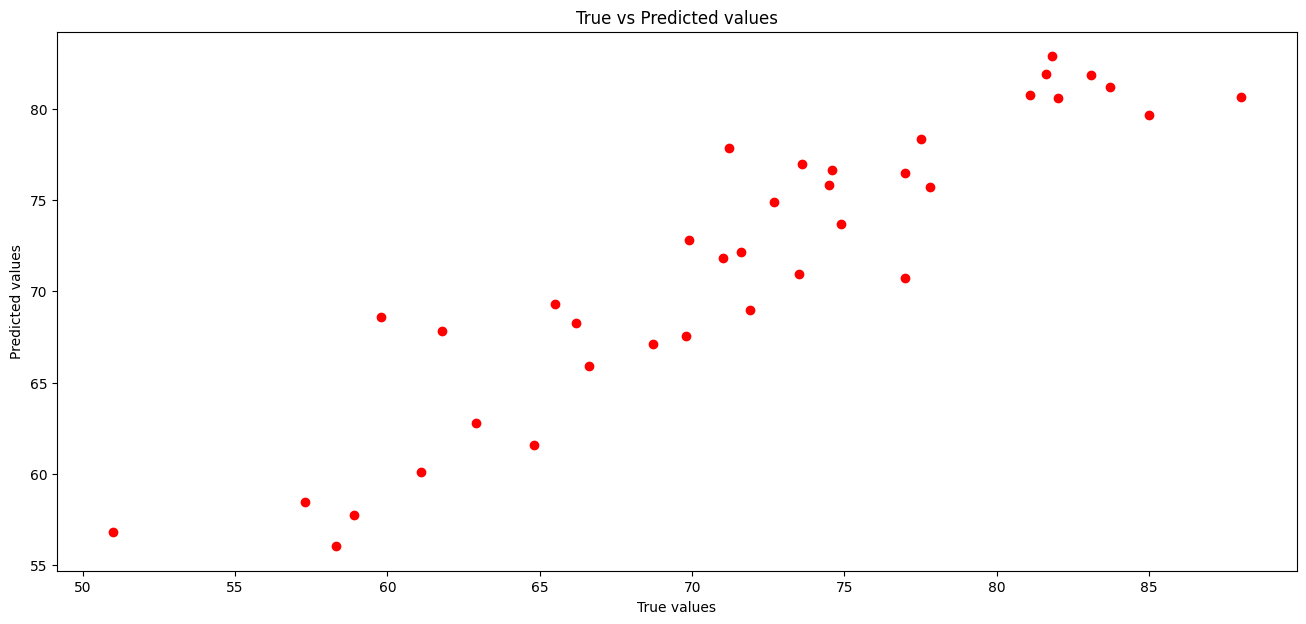

In [265]:
fig, ax = plt.subplots(figsize=(16, 7))

ax.scatter(x=y_test, y=y_pred_test, color='red')
ax.set_xlabel('True values')
ax.set_ylabel('Predicted values')

plt.title('True vs Predicted values')
plt.show()

Model oparty na zmiennych "Adult Mortality", "HIV/AIDS", "Income composition of resources", oraz "Schooling" do przewidywania "Life expectancy" wykazuje bardzo dobre dopasowanie, co potwierdzają wyniki wskaźnika R2 wynoszące 0.8464 dla zestawu treningowego i 0.8504 dla zestawu testowego. Te wartości wskazują na wysoką zdolność modelu do wyjaśniania zmienności oczekiwanej długości życia. Średni błąd bezwzględny (MAE) oraz pierwiastek błędu kwadratowego (RMSE) są stosunkowo niskie, odpowiednio 2.19 i 3.10 dla zestawu treningowego oraz 2.59 i 3.39 dla zestawu testowego, co świadczy o precyzyjności predykcji. Wykres wartości rzeczywistych w stosunku do przewidywanych pokazuje, że model dobrze radzi sobie z predykcją w całym zakresie danych. Wyniki te sugerują, że model jest **dobrze dopasowany** i skutecznie generalizuje na nowe dane.